<div class="frontmatter text-center">
<h1> Introduction to Data Science and Programming</h1>
<h2>Lecture 11: Array programming with numpy</h2>
<h3>IT University of Copenhagen, Fall 2020</h3>
<h3>Instructor: Michael Szell</h3>
</div>

# Source
This notebook was adapted from:
* Scientific Python course by Roberta Sinatra
* a lecture of J.R. Johansson (http://jrjohansson.github.io)
* Python for Data Analysis by Wes McKinney

## Numpy -  multidimensional data arrays
### Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module. The standard way is:

In [5]:
import numpy as np

In [6]:
# Use ? to get help (see the docstring) about commands in Jupyter notebook
?np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. Numpy's array object is called `ndarray`, for N-dimensional array.



In [7]:
a = [[1,2], [3,4]]
a[0][0]

1

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [10]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [11]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The vector has 1 dimension, the matrix has 2. We learn this with `numpy.ndim`.

In [12]:
np.ndim(v), np.ndim(M)

(1, 2)

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [13]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [14]:
v.shape

(4,)

In [15]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [16]:
v.size

4

In [17]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [18]:
np.shape(M)

(2, 2)

In [19]:
np.size(M)

4

So far the `numpy.ndarray` looks awfully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [20]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [ ]:
M[0,0] = "hello"

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [ ]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [ ]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step. Like the function range for lists!
x

In [21]:
x = np.arange(-1, 1, 0.1) #note that here we can use floats and non-integer steps. You could not do this with lists
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [22]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [ ]:
np.logspace(0, 1, 5, base=10)

In [ ]:
import math
np.logspace(0, 1, 5, base=math.exp(1))

#### Random data

In [ ]:
from numpy import random # numpy has also its set of random functions

In [ ]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

standard normal distributed random numbers $\mu = 0$ and $\sigma^2=1$

In [ ]:
np.random.randn(5,5)

There is a huge variety of functions that you can use: 
<img src="random1.png" width="700px"/>



and you can generate samples from all the major distributions.
Have a look at the documentation at https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html:
<img src="random2.png" width="700px"/>

#### zeros and ones

You can also create arrays filled with the same element:

In [23]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [24]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
np.zeros((3,3))+2 # We will see more matrix and vector operations later

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [26]:
np.ones((3,3))*4 # We will see more matrix and vector operations later

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

The function `numpy.empty` initializes an "empty" array.

In [ ]:
np.empty((3,3))

 <span style="color:red">It is not safe to assume that np.empty will return an array of all zeros. In many cases it will return uninitialized garbage values!</span>

## Manipulating arrays
### Indexing
We can index elements in an array using square brackets and indices:

In [ ]:
v = np.array([1,2,3,4])
M = np.array([[1, 2], [3, 4]])
# v is a vector, and has only one dimension, taking one index
v[0]

In [ ]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

<img src="indexing.png" width="400px"/>

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [27]:
M

array([[1, 2],
       [3, 4]])

In [28]:
M[1]

array([3, 4])

*** 
### Quick exercise
If I have a list of lists, what is the syntax to access the first element of the first list? Pay attention to the difference with arrays!
***

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [61]:
A = np.array([1,2,3,4,5])


It works in the same way as for **lists**.

In [62]:
A[1:3]

array([2, 3])

In [ ]:
A[1:3] = [-2,-3]
A

In [ ]:
A[::] # lower, upper, step all take the default values

In [ ]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

In [ ]:
A[:3] # first three elements

In [ ]:
A[3:] # elements from index 3

Negative indices counts from the end of the array (positive index from the beginning):

In [ ]:
A[-1:]

In [ ]:
A[-2:]

Index slicing works exactly the same way for multidimensional arrays:

In [ ]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

In [ ]:
# a block from the original array
A[1:4, 1:4]

<img src="slicing.png" width="400px"/>

The devil is in the details!

In [ ]:
A[4:,:]


In [ ]:
A[4,:]

### An index slice only creates a view!
An important distinction from lists is that array slices are *views* on the original array. This means that  <span style="color:red">the data is not copied, and any modifications to the view will be reflected in the source array!</span>

In [ ]:
arr = np.arange(10)
arr

In [ ]:
arr_slice = arr[5:8]
arr_slice

In [ ]:
arr_slice[:] = 666
arr

In [ ]:
arr[:] = 999
arr_slice

<span style="color:red">If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array; for example `arr[5:8].copy()`</span>

### Fancy indexing
Fancy indexing is the name for when an array or list is used in-place of an index: 

In [30]:
A

NameError: name 'A' is not defined

In [29]:
row_indices = [1, 2, 3]
A[row_indices,:] # this selects the second, third and fourth row of A, and all its columns

NameError: name 'A' is not defined

In [ ]:
A[row_indices] #this is equivalent to the expression above

<span style="color:red">Fancy indexing, unlike slicing, always copies the data into a new array.</span>

In [ ]:
row_indices = [1, 2, 3]
A

In [ ]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

*** 
### Quiz
If this is matrix `A`:  
`[[ 0,  1,  2,  3,  4],  
  [10, 11, 12, 13, 14],  
  [20, 21, 22, 23, 24],  
  [30, 31, 32, 33, 34],  
  [40, 41, 42, 43, 44]]`

Then what is the output of `A[[1,2,3], [1,-1,2]]`?
***

In [ ]:
different_col_indices = [1, -1, 2] 
# A[row_indices, different_col_indices] # Uncomment to see solution

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [ ]:
B = np.array([n for n in range(5)])
B

In [ ]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

In [ ]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool) #1 is true, 0 is false
B[row_mask]

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [ ]:
x = np.arange(1, 7, 0.5)
x

In [ ]:
mask = (3 < x) & (x < 6.5)
# Always use parentheses for mask conditions. Only then can you join them with & and | 

mask

In [ ]:
x[mask]

 <span style="color:red">The Python keywords `and` and `or` do not work with boolean arrays. Use instead `&` and `| `.</span>

## Functions for extracting data from arrays and creating arrays

### where
cc

In [31]:
x = np.arange(-1, 8, 0.5)
mask = (3 < x) & (x < 6.5)
indices = np.where(mask)
print(type(indices))
indices

<class 'tuple'>


(array([ 9, 10, 11, 12, 13, 14]),)

In [32]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([3.5, 4. , 4.5, 5. , 5.5, 6. ])

In [33]:
x

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,
        4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5])

Setting values with boolean arrays works in a common-sense way. To set all of the negative values to 0 we need only do:

In [ ]:
x[x < 0] = 0
x

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [ ]:
A

In [ ]:
np.diag(A)

In [ ]:
np.diag(A, -1)

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). 

In [34]:
!head stockholm_temperatures.dat # head is a shell command that displays the beginning of a file

1800	1	1	-6.10000000000000
1800	1	2	-15.4000000000000
1800	1	3	-15
1800	1	4	-19.3000000000000
1800	1	5	-16.8000000000000
1800	1	6	-11.4000000000000
1800	1	7	-7.60000000000000
1800	1	8	-7.10000000000000
1800	1	9	-10.1000000000000
1800	1	10	-9.50000000000000


The file stockholm_temperatures.dat contains the temperature in Stockholm since 1800 until 2011. The first three columns are respectively year, month and day, and the last column is the temperature.

To read data from such files into Numpy arrays we can use the `numpy.loadfromtxt` function. For example:

In [36]:
data = np.loadtxt('stockholm_temperatures.dat') 

In [37]:
data.shape

(77431, 4)

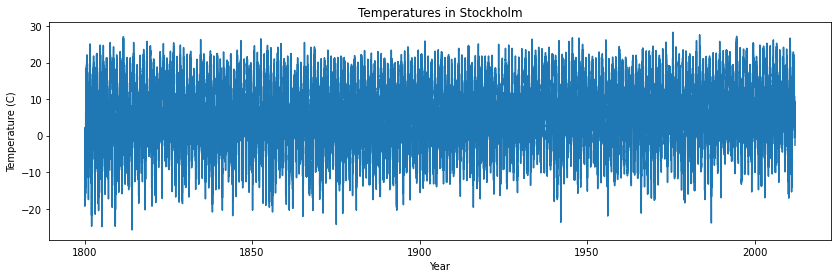

In [38]:
# Ignore this code for now - we will explain it later.
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,3])
ax.set_title('Temperatures in Stockholm')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)');

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [40]:
M = np.random.rand(3,3)
M

array([[0.41618372, 0.39823913, 0.26170711],
       [0.85842591, 0.07001411, 0.07920943],
       [0.88304694, 0.54688941, 0.95919205]])

In [42]:
np.savetxt("random-matrix.csv", M)

In [43]:
!head random-matrix.csv

4.161837226674868218e-01 3.982391346044769076e-01 2.617071142008663420e-01
8.584259069391103614e-01 7.001411399058754537e-02 7.920942952742948684e-02
8.830469448488683648e-01 5.468894065604862353e-01 9.591920509689089158e-01


In [44]:
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format
!head random-matrix.csv

0.41618 0.39824 0.26171
0.85843 0.07001 0.07921
0.88305 0.54689 0.95919


### Numpy's native file format (uncompressed)

`np.save` and `np.load` are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension `.npy`.

In [45]:
np.save("random-matrix.npy", M)
!file random-matrix.npy # file is a shell command that displays the file type

random-matrix.npy: NumPy array, version 1.0, header length 118


In [46]:
np.load("random-matrix.npy")

array([[0.41618372, 0.39823913, 0.26170711],
       [0.85842591, 0.07001411, 0.07920943],
       [0.88304694, 0.54688941, 0.95919205]])

### Numpy's native file format (compressed)

You save multiple arrays in a zip archive using `np.savez` and passing the arrays as keyword arguments:

In [ ]:
np.savez('array_archive.npz', a=M, b=data)

When loading an .npz file, you get back a dict-like object which loads the individual arrays:

In [ ]:
arch = np.load('array_archive.npz')
arch['a']

### Special values

In [47]:
a = np.arange(4)
a = a/0 # [0/0 1/0 2/0 3/0]
a

<ipython-input-47-df8d9232bd09>:2: RuntimeWarning: divide by zero encountered in true_divide
  a = a/0 # [0/0 1/0 2/0 3/0]
<ipython-input-47-df8d9232bd09>:2: RuntimeWarning: invalid value encountered in true_divide
  a = a/0 # [0/0 1/0 2/0 3/0]


array([nan, inf, inf, inf])

In [48]:
np.nan == np.nan # nan is not equal to anything, not even nan

False

In [49]:
np.isnan(a) # nan is nan

array([ True, False, False, False])

In [50]:
np.isinf(a) # nan is not infinite

array([False,  True,  True,  True])

In [51]:
np.isfinite(a) # nan is not finite

array([False, False, False, False])

#### Selecting subsets of a real data set

We can select subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above), and run computations later.

For example, if we want to calculate the average temperature in 1971 only, we can create a mask in the following way:

In [52]:
# reminder, the temperature dataset is stored in the data variable:
np.shape(data)

(77431, 4)

In [53]:
mask = (data[:,0] == 1971)
data[mask,0]

array([1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971., 1971.,
       1971., 1971.,

In [54]:
data[mask,3]

array([ -9.2,  -6.5,  -4.7,  -0.3,  -6.8, -11.6,  -1.9,   4.3,   4.6,
         5.9,   4.8,   1.9,   0.8,  -0.9,  -1.5,  -1.5,  -3.9,   2.4,
         1.3,   2. ,   2. ,   1.8,   2.5,   3.7,   4.9,   3.7,   1.7,
        -2.1,  -5.1,  -6.3,   0.2,  -2.7,  -4. ,  -0.6,   1.6,   3.4,
         2.4,  -0.4,  -1.9,  -4.8,  -1.9,   2.5,   2.4,   3.1,   2.5,
         1.7,   1.5,   0.5,   0. ,  -0.3,   0.5,   1.1,   1.1,  -2.1,
         0.6, -11.9,  -8.2,  -8.3,  -7.9,  -7.7,  -8.5, -10.8, -13.5,
        -8.6,  -5.4,  -0.5,   2.1,   0. ,  -4.6,  -3.5,  -3. ,  -0.8,
         0.4,  -0.1,   0.8,   1.6,   1.7,   1.8,   1.3,   0. ,  -2.2,
        -4.4,  -0.3,   3.6,   3.3,  -0.8,  -1.4,   1. ,  -0.5,   0.6,
         4.2,   4. ,   3.6,  -0.7,   0.1,   0.9,   2.5,   5.6,   3.7,
         4.2,   6.1,   5.8,   2.7,   2.3,   3. ,   4.6,   5.2,   6.5,
         9. ,   9.8,   7.6,   3.3,   2.1,   0.5,  -0.3,   0.1,   2.2,
         3.6,   1.2,   3.3,   6.4,   9.9,   8.5,   7.4,   9.4,  12.2,
        14.7,  13.2,

In [55]:
print("This is the mean temperature in Stockholm in 1971: "+str(np.mean(data[mask,3])))

This is the mean temperature in Stockholm in 1971: 6.9301369863013695


If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [56]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [58]:
mask_feb = (data[:,1] == 2)

In [59]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.212109570736596

#### More functions: sum, prod, and trace

In [ ]:
d = np.arange(0, 10)
d

In [ ]:
# sum up all elements
np.sum(d)

In [ ]:
# product of all elements
np.prod(d+1)

In [ ]:
# cummulative sum
np.cumsum(d)

In [ ]:
# cummulative product
np.cumprod(d+1)

In [ ]:
A

In [ ]:
# same as: diag(A).sum()
np.trace(A)

When you have two dimensional objects, you can specificy along which dimension (axis) you want to perform the sum (or mean, or the maximum, etc.)
<img src="sum_axis.png">

In [ ]:
x = np.array([[1, 1], [2, 2]])
print(x.sum(axis=0))   # columns (first dimension)
print(x[:, 0].sum(), x[:, 1].sum())
print(x.sum(axis=1))   # rows (second dimension)
print(x[0, :].sum(), x[1, :].sum())

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [63]:
A

array([1, 2, 3, 4, 5])

In [64]:
n, m = A.shape

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
B = A.reshape((1,n*m))
B

In [ ]:
B[0,0:5] = 5 # modify the array

B

In [ ]:
A # and the original variable is also changed. B is only a different view of the same data

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function creates a copy of the data.

In [ ]:
B = A.flatten()
B

In [ ]:
B[0:5] = 10
B

In [ ]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [ ]:
v = np.array([1,2,3])

In [ ]:
v.shape

In [ ]:
# make a column matrix of the vector v
v[:,np.newaxis]

In [ ]:
# column matrix
v[:,np.newaxis].shape

In [ ]:
# row matrix
v[np.newaxis,:].shape

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [ ]:
a = np.array([[1, 2], [3, 4]])

In [ ]:
# repeat each element 3 times
np.repeat(a, 3)

In [ ]:
# tile the matrix 3 times 
np.tile(a, 3)

### concatenate

In [ ]:
b = np.array([[5, 6]])

In [ ]:
np.concatenate((a, b), axis=0)

In [ ]:
np.concatenate((a, b.T), axis=1)

### hstack and vstack

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a,b.T))

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [ ]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [ ]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [ ]:
Theta_vec = np.vectorize(Theta)

In [ ]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [ ]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [ ]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

In [ ]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [ ]:
M

In [ ]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

In [ ]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

## Using numpy on a photo

In [65]:
# This code loads a photo.
from skimage import io
photo = io.imread('balloons.jpg')
type(photo)

numpy.ndarray

In [66]:
photo.shape

(376, 600, 3)

In [67]:
np.ndim(photo)

3

In [68]:
photo

array([[[128, 155,  86],
        [126, 155,  88],
        [126, 157,  89],
        ...,
        [219, 234, 179],
        [220, 233, 179],
        [220, 233, 177]],

       [[124, 153,  86],
        [125, 154,  87],
        [124, 155,  87],
        ...,
        [218, 232, 179],
        [217, 232, 177],
        [218, 231, 177]],

       [[125, 154,  87],
        [125, 152,  85],
        [120, 151,  83],
        ...,
        [218, 232, 181],
        [220, 233, 180],
        [216, 230, 177]],

       ...,

       [[ 51,  75,  25],
        [ 50,  76,  29],
        [ 52,  77,  37],
        ...,
        [ 53,  77,  29],
        [ 48,  74,  27],
        [ 51,  78,  33]],

       [[ 92, 114,  76],
        [ 79, 101,  63],
        [ 63,  88,  48],
        ...,
        [ 59,  86,  35],
        [ 60,  86,  39],
        [ 57,  86,  40]],

       [[142, 163, 132],
        [154, 175, 142],
        [156, 180, 144],
        ...,
        [ 58,  84,  36],
        [ 61,  87,  40],
        [ 60,  86,  39]]

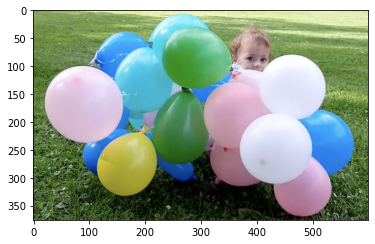

In [69]:
# This code plots a photo. Ignore this for now - we will cover plotting in a later class.
plt.imshow(photo);

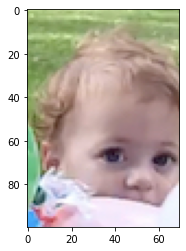

In [70]:
plt.imshow(photo[20:120, 350:420]);

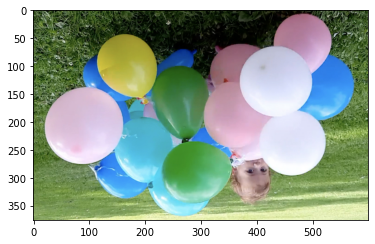

In [71]:
plt.imshow(photo[::-1]);

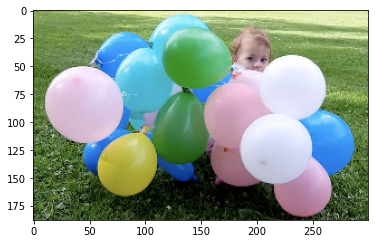

In [72]:
plt.imshow(photo[::2, ::2]);

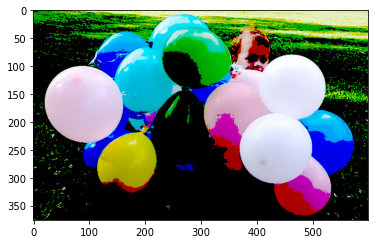

In [73]:
# when np.where is used with 3 arguments, it replaces all True elements with the second, and all False elements with the third
photo_masked = np.where(photo > 155, photo, 0) 
plt.imshow(photo_masked);

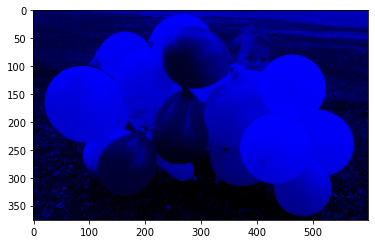

In [74]:
photo_onlyblue = np.copy(photo)
photo_onlyblue[:, :, :-1] = 0
plt.imshow(photo_onlyblue);

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [ ]:
v1 = np.arange(0, 5)

In [ ]:
v1 * 2

In [ ]:
v1 + 2

In [ ]:
A * 2

In [ ]:
A + 2

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [ ]:
A * A # element-wise multiplication

In [ ]:
v1 * v1

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [ ]:
A.shape, v1.shape

In [ ]:
A * v1

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [ ]:
np.dot(A, A)

In [ ]:
np.dot(A, v1)

In [ ]:
np.dot(v1, v1)

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [ ]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector

In [ ]:
v

In [ ]:
M * M

In [ ]:
M * v

In [ ]:
# inner product
v.T * v

In [ ]:
# with matrix objects, standard matrix algebra applies
v + M*v

If we try to add, subtract or multiply objects with incompatible shapes we get an error:

In [ ]:
v = np.matrix([1,2,3,4,5,6]).T

In [ ]:
M.shape, v.shape

In [ ]:
M * v

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.